In [ ]:
import importlib
import modules
from collections import Counter
import numpy as np

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt

from modules import run_model_stochastic
import random

importlib.reload(modules)

In [ ]:
density_list = np.linspace(0.3, 0.9, 100)
L = 100
T = 50
n_repetitions = 100
v_max = 5
trials = 5
shannon_entropy = {}

import itertools

for p in density_list:
    print(p)
    for n in range(trials):
        lifespan_counter, jam_counter, all_evolutions = run_model_stochastic(p, L, T, n_repetitions, v_max, return_evolutions=True)
        merged = list(itertools.chain.from_iterable(list(itertools.chain.from_iterable(all_evolutions))))
        second_items = [tuple_item[1] for tuple_item in merged]
        speeds = Counter(second_items)
        
        probabilities = [count / len(second_items) for count in speeds.values()]

        # shannon_entropy[p] += -sum(p * np.log2(p) for p in probabilities)

        if p not in shannon_entropy:
                    shannon_entropy[p] = [-sum(p * np.log2(p) for p in probabilities)]
        else:
            shannon_entropy[p] += [-sum(p * np.log2(p) for p in probabilities)]


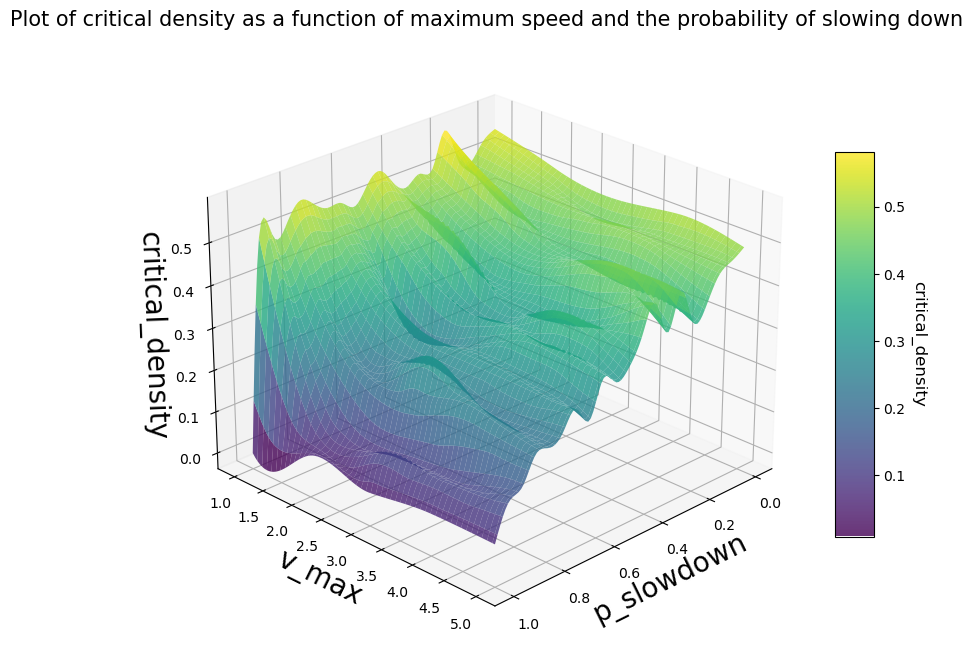

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

def plot3D(filepath):
    df = pd.read_csv(filepath)

    # Load in values
    x_values = df['p_slowdown'].values
    y_values = df['v_max'].values
    z_values = df['critical_density'].values

    # Create grid to later put Z values on
    xi, yi = np.linspace(min(x_values), max(x_values), 100), np.linspace(min(y_values), max(y_values), 100)

    # Put actual datapoints on grid
    X, Y = np.meshgrid(xi, yi)

    # Put z_value data on the grid and interpolate 
    Z = griddata((x_values, y_values), z_values, (X, Y), method='cubic')

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    ax.set_xlabel('p_slowdown', fontsize=20)
    ax.set_ylabel('v_max', fontsize=20)
    ax.set_zlabel('critical_density', fontsize=20)
    ax.set_title('Plot of critical density as a function of maximum speed and the probability of slowing down', fontsize=15)

    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('critical_density', rotation=270, labelpad=15, fontsize=12)

    ax.view_init(elev=25, azim=45) 
    plt.savefig('test.png')

filepath = 'Results/critical_densities_nasch_n=10_L=300_T=150_#p=50.csv'
plot3D(filepath)
